In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import requests
from bs4 import BeautifulSoup
from collections import defaultdict

## CP321 Final Project
Gbone Atsagbede
203359820
15th April, 2024

## Introduction

Welcome to my exploration of Ontario's Registered Marriage Officiants dataset and population demographics! In this analysis, I will delve into the affiliations of marriage officiants across municipalities, aiming to identify common patterns and geographic variations. The Registered Marriage Officiants dataset, sourced from the official Ontario government repository, provides detailed information on officiant locations, first and last names, and affiliations. Additionally, I will explore population demographics using data from the same source, offering a broader context for the analysis. By juxtaposing the marriage officiants dataset with population demographics, I hope to gain insights into the interplay between affiliations and geographic regions. Below are the links to both sources
https://data.ontario.ca/dataset/registered-marriage-officiants/resource/e010f610-c3d6-4f88-849b-6f8c11e98d9c. 
https://www.citypopulation.de/en/canada/ontario/lly.

## Table of Content
1. Data Acquisition
2. Data Analysis
3. Data Visualization
4. Conclusion



## How do geographic variations influence the distribution of common affiliations among marriage officiants, and to what extent is this influenced by population demograicv?s.

In this analysis, I aim to answer fundamental questions about the distribution of affiliations among Ontario's marriage officiants, exploring whether geographic patterns/trends emerge. To achieve this, I'll conduct both quantitative and qualitative analyses, employing visualization techniques to draw meaningful conclusions. Furthermore, I will examine the potential influence of population demographics on affiliation numbers by integrating data from another source. This supplementary dataset, obtained from censuses conducted between 2001 and 2021, provides population figures for various cities in Ontario. However, I will only focus on the most recent population count, as of 2021, to assess any correlations between population size and affiliation numbers.

You can access the population dataset [here](https://www.citypopulation.de/en/canada/ontario/), which offers comprehensive insights into Ontario's population landscape. overy.

In [2]:
df = pd.read_csv("marriage.csv")
df.head()

,Municipality,Last Name,First Name,Affiliation
0,Acton,Benham,John James L,Western Ontario Waterways Regional Council - U...
1,Acton,Berry,Cheryl Anne,Spiritualist Church Of Canada
2,Acton,Crerar,Thomas Charles,Celebrating Life Ministries
3,Acton,Kabugi,Naomi Gakenia,The Anglican Church Of Canada Diocese Of Niagara
4,Acton,King,Shirley,Salvation Army


## Quantitative Analysis 

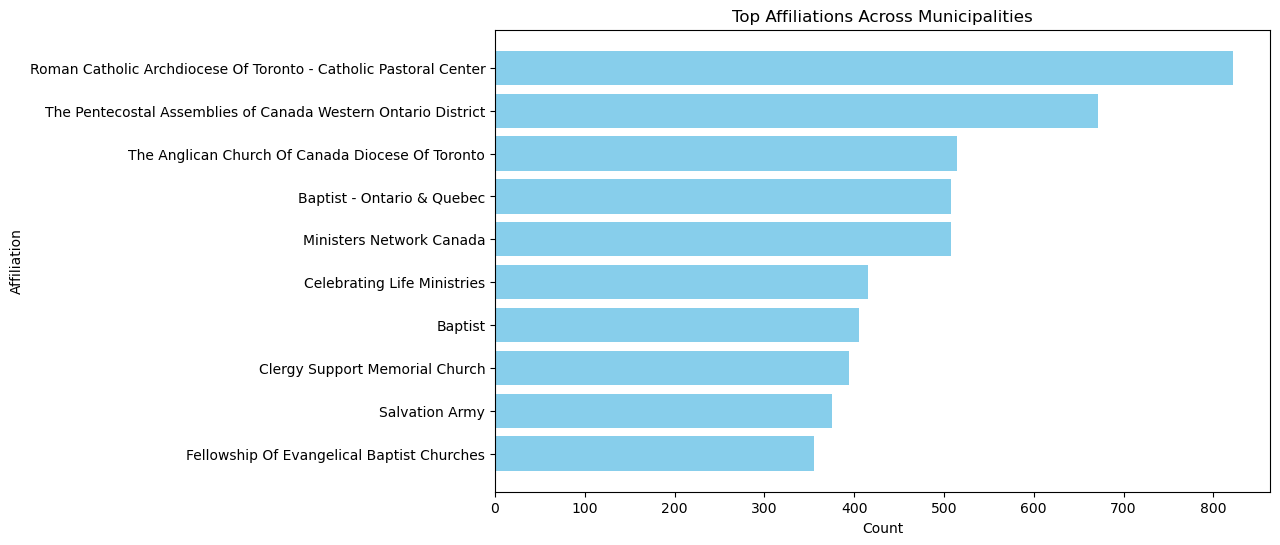

"\naffiliation_counts = df['Affiliation'].value_counts().head(10)\n# Plotting\nplt.figure(figsize=(10, 6))\nsns.barplot(x=affiliation_counts.values, y=affiliation_counts.index, palette='viridis')\nplt.title('Top Affiliations Across Municipalities')\nplt.xlabel('Count')\nplt.ylabel('Affiliation')\nplt.show()\n"

In [3]:
# Count the frequency of each affiliation
affiliation_counts = df['Affiliation'].value_counts().head(10)

# Plotting without seaborn
plt.figure(figsize=(10, 6))
plt.barh(affiliation_counts.index, affiliation_counts.values, color='skyblue')
plt.title('Top Affiliations Across Municipalities')
plt.xlabel('Count')
plt.ylabel('Affiliation')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.show()

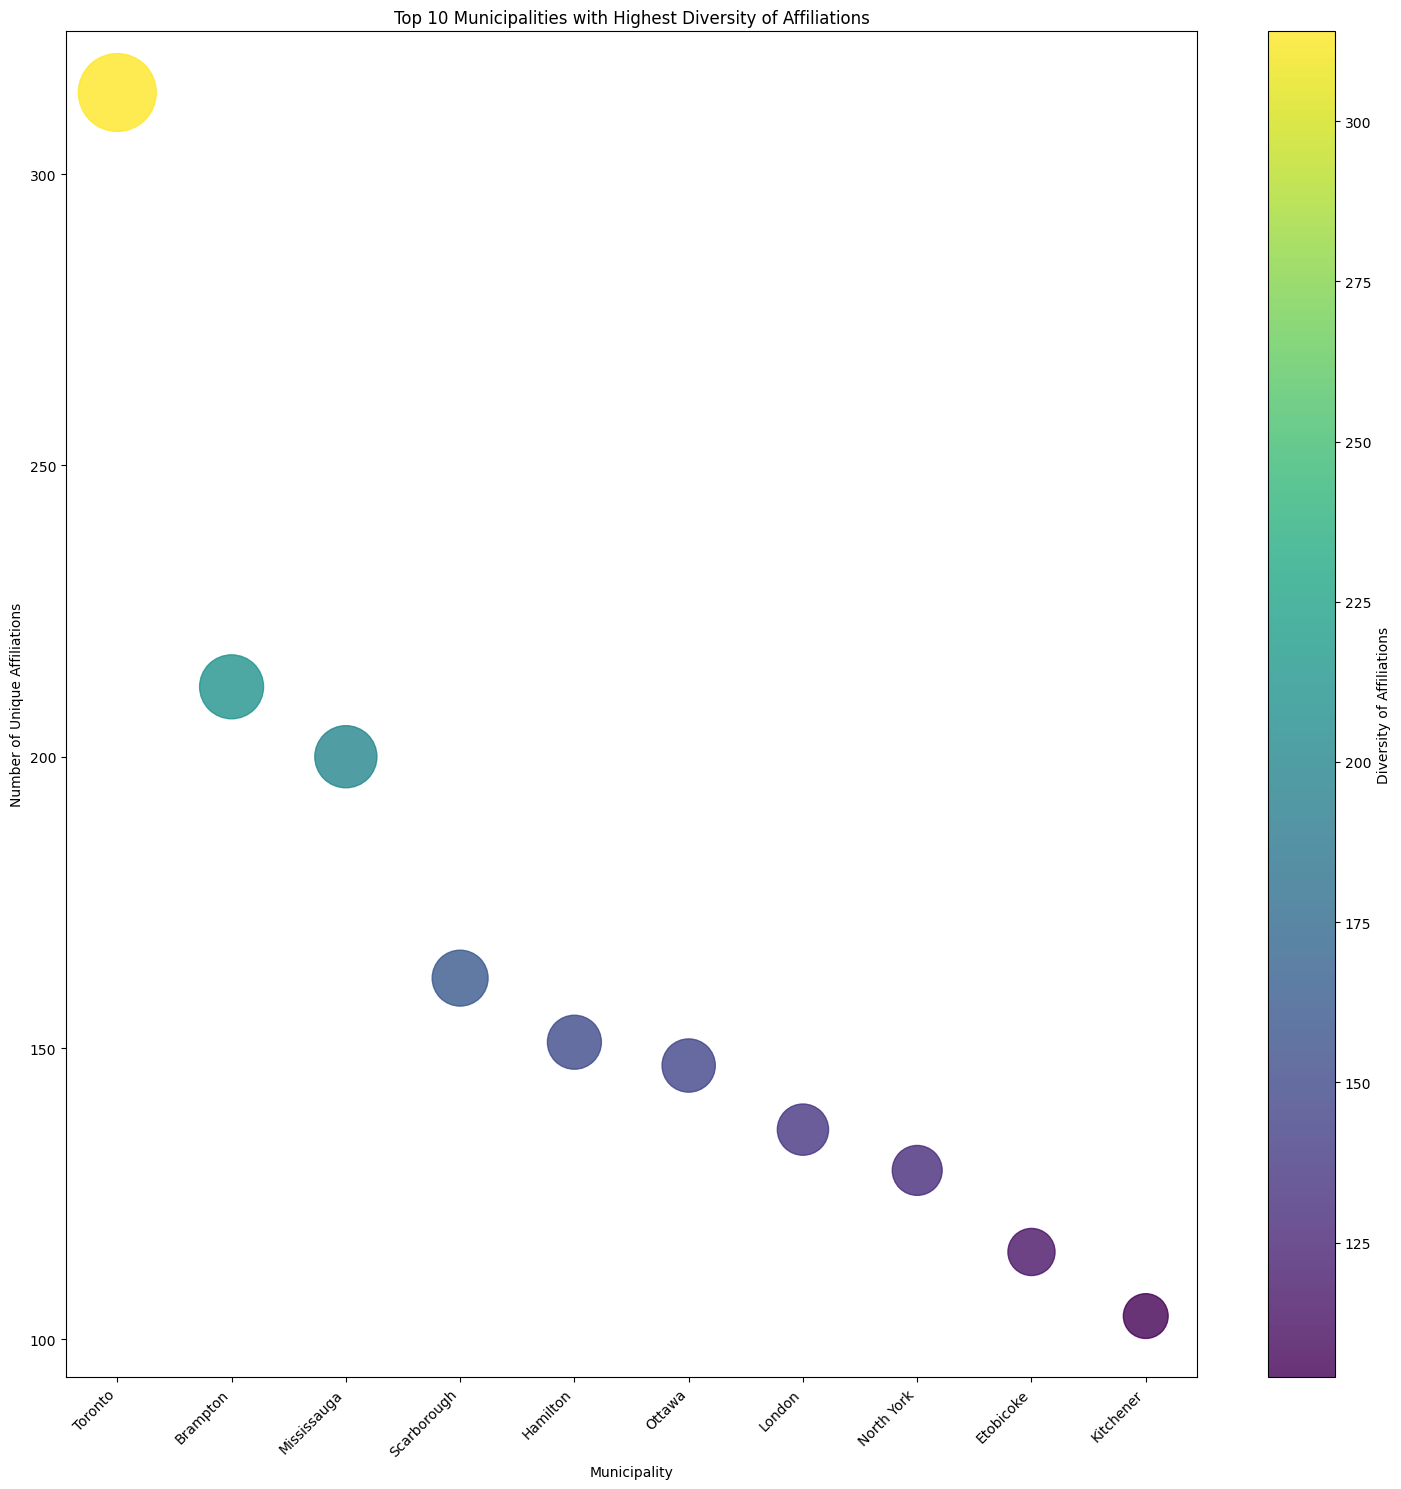

In [5]:
# Calculate the number of unique affiliations in each municipality
municipality_affiliation_counts = df.groupby('Municipality')['Affiliation'].nunique().reset_index(name='Affiliation_Count')

# Choose the top 10 municipalities with the highest diversity of affiliations
top_municipalities = municipality_affiliation_counts.nlargest(10, 'Affiliation_Count')

# Plotting
plt.figure(figsize=(15, 15))
plt.scatter(top_municipalities['Municipality'], top_municipalities['Affiliation_Count'], s=top_municipalities['Affiliation_Count']*10, c=top_municipalities['Affiliation_Count'], cmap='viridis', alpha=0.8)
plt.colorbar(label='Diversity of Affiliations')
plt.title(f'Top {10} Municipalities with Highest Diversity of Affiliations')
plt.xlabel('Municipality')
plt.ylabel('Number of Unique Affiliations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This visualization highlights the top municipalities, that is locations that appear the most, with the highest diversity of affiliations. 

In [6]:
# Initialize an empty dictionary to store the top 5 affiliations for each municipality
top_affiliationss = defaultdict(list)

# Iterate over each unique municipality
for municipality in df['Municipality'].unique():
    # Filter the DataFrame for the current municipality
    municipality_df = df[df['Municipality'] == municipality]
    # Count the occurrences of each affiliation
    affiliation_counts = municipality_df['Affiliation'].value_counts()
    # Get the top 5 affiliations
    top_5_affiliationss = affiliation_counts.head(5).index.tolist()
    # Store the top 5 affiliations in the dictionary
    top_affiliationss[municipality] = top_5_affiliationss

In [7]:
print(top_municipalities)

     Municipality  Affiliation_Count
1193      Toronto                314
128      Brampton                212
714   Mississauga                200
1004  Scarborough                162
461      Hamilton                151
857        Ottawa                147
632        London                136
821    North York                129
365     Etobicoke                115
586     Kitchener                104


In [8]:
top_municipality = top_municipalities['Municipality'].tolist()

## Qualitative Analysis 

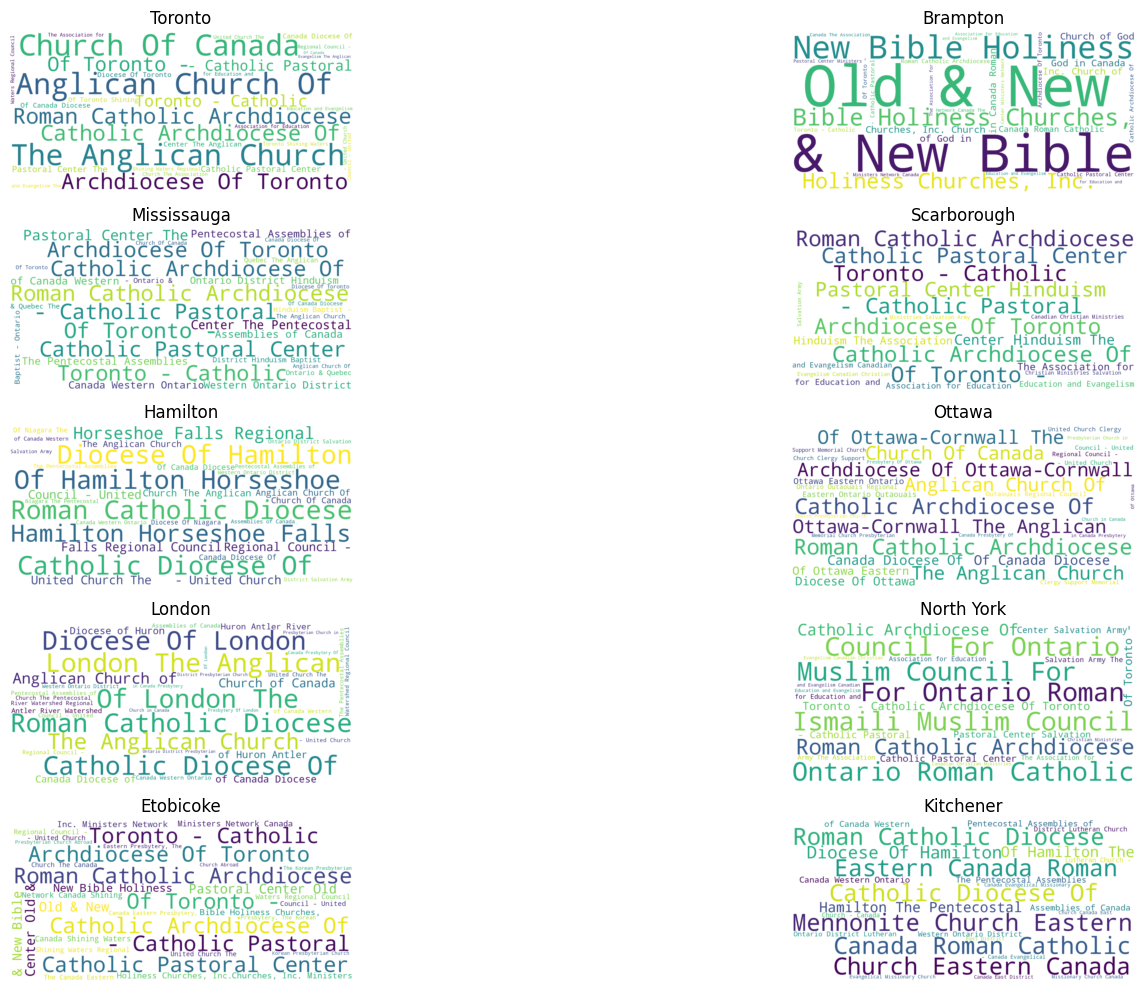

In [9]:
fig, axs = plt.subplots(5, 2, figsize=(20, 10))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Iterate over each municipality and its top 5 affiliations
for i, municipality in enumerate(top_municipality):
    # Check if affiliations are found for the current municipality
    if municipality in top_affiliationss:
        # Extract the top 5 affiliations for the current municipality
        top_affiliations_current = top_affiliationss[municipality]
        
        # Concatenate the affiliations with spaces to create a string
        text = ' '.join(top_affiliations_current)
        
        # Generate n-grams from the text
        ngram_counts = defaultdict(int)
        words = text.split()
        for j in range(len(words) - 1):
            ngram = ' '.join(words[j:j+3])  # Change 2 to the desired n-gram length
            ngram_counts[ngram] += 1
        
        # Create a dictionary with the n-gram counts
        ngram_dict = {k: v for k, v in ngram_counts.items()}
        
        # Generate the word cloud from the n-grams
        wordcloud = WordCloud(width=1500, height=700, background_color='white').generate_from_frequencies(ngram_dict)
        
        # Plot the word cloud on the current subplot
        axs[i].imshow(wordcloud, interpolation='bilinear')
        axs[i].set_title(municipality)
        axs[i].axis('off')
    else:
        # Print a message indicating that no affiliations are found for the municipality
        print(f"No affiliations found for municipality {municipality}")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


The word clouds above offer a glimpse into the affiliation patterns of the top 10 municipalities, highlighting their most frequently occurring affiliations. While some affiliations appear with equal frequency, resulting in similar sizes in the word clouds, distinct trends emerge across the municipalitie 

Notably, certain affiliations, such as "Roman Catholic eoc..s.. of," are prominently featured in municipalities like Hamilton, London, and Kitchener. Similarly, affiliations associated with the "Roman Catholic Archdiocese  T..or..onto" are prevalent in Toronto, Mississauga, Ottawa, Scarborough, North York, and Etobic e.

These consistent patterns suggest regional preferences or affiliations associated with specific religious organizations, reflecting the cultural and demographic characteristics of each pality in municiOntario.

## Online Visualization and Analysis 

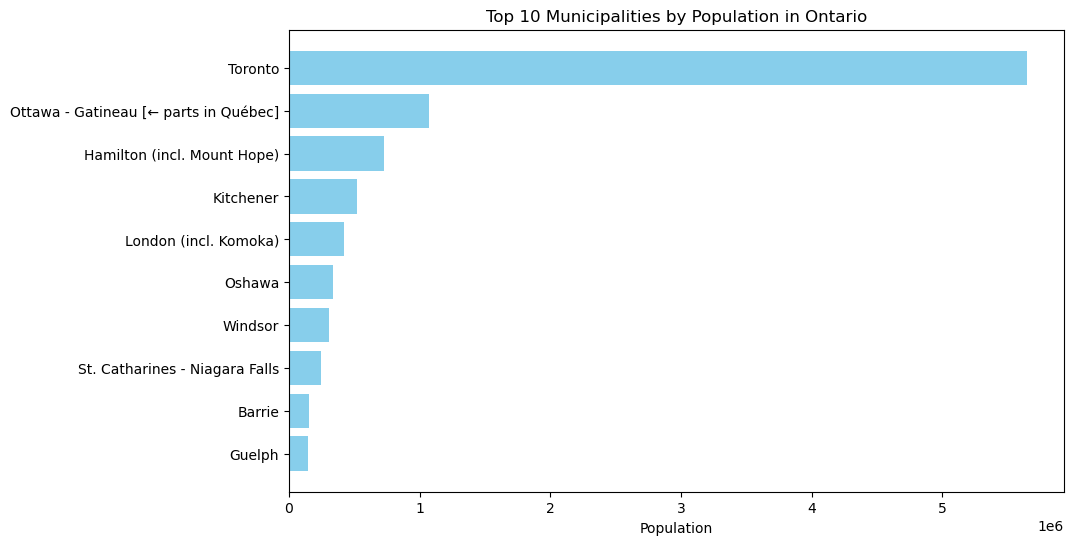

In [2]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
# Fetch the webpage content
url = "https://www.citypopulation.de/en/canada/ontario/"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all tables on the webpage
    tables = soup.find_all('table')

    # Check if the webpage contains at least two tables
    if len(tables) >= 2:
        # Extract the second table containing municipality data
        table = tables[1]

        # Check if the table was found
        if table:
            # Initialize lists to store municipality names and populations
            municipalities = []
            populations = []

            # Extract the rows from the table
            rows = table.find_all('tr')

            # Iterate over each row and extract the data
            for row in rows:
                # Extract the columns from the row
                columns = row.find_all('td')

                # Check if the row contains data
                if columns:
                    # Extract the municipality name and population
                    municipality = columns[0].text.strip()
                    population = columns[6].text.strip()

                    # Append the municipality name and population to the lists
                    municipalities.append(municipality)
                    populations.append(int(population.replace(",", "")))  # Remove commas and convert to integer

            # Sort municipalities and populations based on population (descending order)
            sorted_data = sorted(zip(populations, municipalities), reverse=True)

            # Extract the top 10 municipalities and their populations
            top_10_data = sorted_data[:10]
            top_10_municipalities = [entry[1] for entry in top_10_data]
            top_10_populations = [entry[0] for entry in top_10_data]

            # Create the bar plot
            plt.figure(figsize=(10, 6))
            plt.barh(top_10_municipalities, top_10_populations, color='skyblue')
            plt.xlabel('Population')
            plt.title('Top 10 Municipalities by Population in Ontario')
            plt.gca().invert_yaxis()  # Invert y-axis to display the highest population at the top
            plt.show()
        else:
            print("Table not found on the webpage.")
    else:
        print("The webpage does not contain multiple tables.")
else:
    print("Failed to fetch the webpage. Status code:", response.status_code)


The visualization above highlights the top 10 largest cities in Ontario based on population size, with Toronto, Ottawa, Hamilton, Kitchener, and London among the prominent entries. This aligns with the top 10 municipalities found prior. However, it's important to note that the dataset may not capture all municipalities, as evidenced by the absence of certain entries (the remaining 5 from the top municipalities test). This limitation restricts the comprehensive representation of Ontario's municipal landscape. Furthermore, the dataset's last updated date of 2021-05-11 underscores the need for regular updates to ensure the accuracy and relevance of demographic information.ion.

## Conclusion

In conclusion, this analysis demonstrates a clear correlation between population size and affiliation diversity among municipalities. Generally, larger populations tend to attract a more diverse range of businesses, organizations, and services, leading to a higher number of affiliations. This observation underscores the influence of population demographics on affiliation patterns within Ontario. Furthermore, these findings highlight consistent affiliation trends across various municipalities, as revealed by word cloud visualizations. Certain affiliations emerge as popular choices across different geographic areas, suggesting broader patterns of preference among marriage officiants. Overall, my exploration sheds light on the intricate interplay between population dynamics and affiliation distributions, offering valuable insights into the factors shaping Ontario's marriage officiant landscape.scape.